In [1]:
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn import model_selection

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [3]:
final_data=pd.read_csv('final_toxic.csv')

In [4]:
final_data.head()

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0000997932d777bf,explanation edits made my username hardcore me...,0,0,0,0,0,0
1,1,000103f0d9cfb60f,daww match background colour im seemingly stuc...,0,0,0,0,0,0
2,2,000113f07ec002fd,hey man im really trying edit war just this gu...,0,0,0,0,0,0
3,3,0001b41b1c6bb37e,cant make real suggestion improvement wondered...,0,0,0,0,0,0
4,4,0001d958c54c6e35,sir my hero chance remember page thats,0,0,0,0,0,0


In [5]:
final_data.shape

(159571, 9)

In [6]:
final_data.dropna(inplace=True)
final_data.drop_duplicates(inplace=True)

In [7]:
final_data.shape

(159505, 9)

# Exploratory Data Analysis (EDA):

Counting number of comments in each label

In [8]:
columns=list(final_data.columns[3:])

In [9]:
values=list(final_data.iloc[:,3:].sum().values)

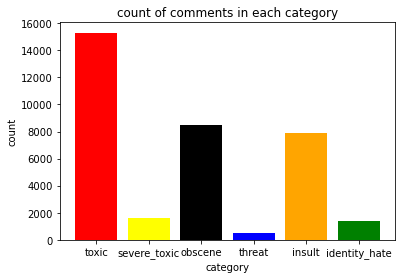

In [10]:
c = ['red', 'yellow', 'black', 'blue', 'orange','green']
plt.bar(columns,values,color=c)
plt.title('count of comments in each category')
plt.xlabel('category')
plt.ylabel('count')
plt.savefig('plot.png')
plt.show()

counting number of comments which belongs to multiple label

In [11]:
value=final_data.iloc[:,2:].sum(axis=1)

C:\Users\MY  PC\AppData\Local\Temp\ipykernel_3312\3964306647.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  value=final_data.iloc[:,2:].sum(axis=1)


In [12]:
labels_count=value.value_counts()

In [13]:
labels_count=labels_count.iloc[1:]

In [14]:
print(labels_count.index)

Int64Index([1, 3, 2, 4, 5, 6], dtype='int64')


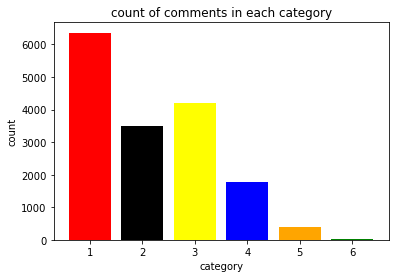

In [15]:
c = ['red', 'yellow', 'black', 'blue', 'orange','green']
plt.bar(labels_count.index,labels_count,color=c)
plt.title('count of comments in each category')
plt.xlabel('category')
plt.ylabel('count')
plt.show()

# TF-IDF 

In [16]:
from sklearn import model_selection,preprocessing
from sklearn.metrics import accuracy_score

In [17]:
vectorizer=TfidfVectorizer(max_features=10000)
vectors=vectorizer.fit_transform(final_data['comment_text'])

In [18]:
print(vectors.shape)

(159505, 10000)


In [19]:
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(vectors,final_data.iloc[:,3:],test_size=0.3)

# Model Building

# Model1- Using Chain Classifier Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from skmultilearn.problem_transform import ClassifierChain
from sklearn.multioutput import ClassifierChain

In [21]:
model1=ClassifierChain(LogisticRegression(max_iter=1000))
model1.fit(X_train,Y_train)

ClassifierChain(base_estimator=LogisticRegression(max_iter=1000))

In [22]:
accuracy_score(model1.predict(X_test),Y_test)

0.9190420463094542

In [23]:
print(classification_report(model1.predict(X_test),Y_test,target_names=columns,zero_division=0))

               precision    recall  f1-score   support

        toxic       0.60      0.91      0.72      3033
 severe_toxic       0.16      0.55      0.25       139
      obscene       0.68      0.89      0.77      1971
       threat       0.12      0.72      0.20        25
       insult       0.62      0.74      0.67      1963
identity_hate       0.19      0.74      0.31       110

    micro avg       0.58      0.85      0.69      7241
    macro avg       0.39      0.76      0.49      7241
 weighted avg       0.61      0.85      0.70      7241
  samples avg       0.05      0.05      0.05      7241



#  Model2-Using  LabelPowerset Logistic Regression

In [24]:
from skmultilearn.problem_transform import LabelPowerset

In [25]:
model2=LabelPowerset(LogisticRegression(max_iter=1000))
model2.fit(X_train,Y_train)

LabelPowerset(classifier=LogisticRegression(max_iter=1000),
              require_dense=[True, True])

In [26]:
accuracy_score(model2.predict(X_test),Y_test)

0.9170776561063279

In [27]:
print(classification_report(model2.predict(X_test),Y_test,target_names=columns,zero_division=0))

               precision    recall  f1-score   support

        toxic       0.53      0.93      0.67      2635
 severe_toxic       0.11      0.51      0.18       106
      obscene       0.59      0.91      0.72      1668
       threat       0.05      0.70      0.09        10
       insult       0.53      0.80      0.64      1586
identity_hate       0.15      0.74      0.25        86

    micro avg       0.50      0.88      0.64      6091
    macro avg       0.33      0.76      0.43      6091
 weighted avg       0.53      0.88      0.66      6091
  samples avg       0.04      0.05      0.04      6091



# Model3- Using Binary Relavance Logistic Regression

In [28]:
from skmultilearn.problem_transform import BinaryRelevance

In [29]:
model3=BinaryRelevance(LogisticRegression(max_iter=1000))
model3.fit(X_train,Y_train)

BinaryRelevance(classifier=LogisticRegression(max_iter=1000),
                require_dense=[True, True])

In [30]:
accuracy_score(model3.predict(X_test),Y_test)

0.9176627936136421

In [31]:
print(classification_report(model3.predict(X_test),Y_test,target_names=columns,zero_division=0))

               precision    recall  f1-score   support

        toxic       0.60      0.91      0.72      3033
 severe_toxic       0.20      0.54      0.29       173
      obscene       0.63      0.92      0.75      1740
       threat       0.11      0.70      0.18        23
       insult       0.52      0.83      0.64      1495
identity_hate       0.18      0.73      0.29       105

    micro avg       0.55      0.88      0.67      6569
    macro avg       0.37      0.77      0.48      6569
 weighted avg       0.57      0.88      0.69      6569
  samples avg       0.05      0.05      0.05      6569



# 4.Model-Classifier Chain Method using NaiveBayes

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier

In [33]:
model4=ClassifierChain(MultinomialNB())
model4.fit(X_train,Y_train)

ClassifierChain(base_estimator=MultinomialNB())

In [34]:
accuracy_score(model4.predict(X_test),Y_test)

0.9076527626849452

In [35]:
print(classification_report(model4.predict(X_test),Y_test,target_names=columns,zero_division=0))

               precision    recall  f1-score   support

        toxic       0.49      0.93      0.64      2408
 severe_toxic       0.23      0.52      0.32       211
      obscene       0.69      0.75      0.72      2329
       threat       0.00      0.00      0.00         6
       insult       0.68      0.69      0.68      2329
identity_hate       0.54      0.20      0.29      1113

    micro avg       0.56      0.71      0.63      8396
    macro avg       0.44      0.52      0.44      8396
 weighted avg       0.59      0.71      0.62      8396
  samples avg       0.04      0.04      0.04      8396



# Model5-  LabelPowerset Using  NaiveBayes

In [36]:
model5=LabelPowerset(MultinomialNB())
model5.fit(X_train,Y_train)

LabelPowerset(classifier=MultinomialNB(), require_dense=[True, True])

In [37]:
accuracy_score(model5.predict(X_test),Y_test)

0.906670567583382

In [38]:
print(classification_report(model5.predict(X_test),Y_test,target_names=columns,zero_division=0))

               precision    recall  f1-score   support

        toxic       0.26      0.99      0.41      1209
 severe_toxic       0.00      0.00      0.00         0
      obscene       0.38      0.95      0.54      1026
       threat       0.00      0.00      0.00         0
       insult       0.37      0.85      0.52      1026
identity_hate       0.00      0.00      0.00         0

    micro avg       0.29      0.93      0.44      3261
    macro avg       0.17      0.46      0.24      3261
 weighted avg       0.33      0.93      0.48      3261
  samples avg       0.02      0.02      0.02      3261



# Model6- BinaryRelevance using  NaiveBayes

In [39]:
model6=BinaryRelevance(MultinomialNB())
model6.fit(X_train,Y_train)

BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])

In [40]:
accuracy_score(model6.predict(X_test),Y_test)

0.9104530636128062

In [41]:
print(classification_report(model6.predict(X_test),Y_test,target_names=columns,zero_division=0))

               precision    recall  f1-score   support

        toxic       0.49      0.93      0.64      2408
 severe_toxic       0.07      0.64      0.13        53
      obscene       0.49      0.91      0.64      1387
       threat       0.00      0.00      0.00         0
       insult       0.41      0.85      0.55      1145
identity_hate       0.02      0.37      0.03        19

    micro avg       0.43      0.90      0.58      5012
    macro avg       0.25      0.62      0.33      5012
 weighted avg       0.46      0.90      0.61      5012
  samples avg       0.03      0.05      0.04      5012



# Model7- Using ChainClassifier SVM

In [42]:
from sklearn.svm import LinearSVC

In [43]:
model7=ClassifierChain(LinearSVC())

In [44]:
model7.fit(X_train,Y_train)

ClassifierChain(base_estimator=LinearSVC())

In [45]:
accuracy_score(model7.predict(X_test),Y_test)

0.9177881802223522

In [46]:
print(classification_report(model7.predict(X_test),Y_test,target_names=columns,zero_division=0))

               precision    recall  f1-score   support

        toxic       0.67      0.86      0.75      3629
 severe_toxic       0.23      0.54      0.32       203
      obscene       0.72      0.85      0.78      2149
       threat       0.21      0.64      0.32        50
       insult       0.63      0.73      0.67      2040
identity_hate       0.29      0.62      0.39       192

    micro avg       0.63      0.81      0.71      8263
    macro avg       0.46      0.71      0.54      8263
 weighted avg       0.65      0.81      0.72      8263
  samples avg       0.06      0.06      0.06      8263



# Model8- LabelPowerset using SVM

In [47]:
model8=LabelPowerset(LinearSVC())

In [48]:
model8.fit(X_train,Y_train)

LabelPowerset(classifier=LinearSVC(), require_dense=[True, True])

In [49]:
accuracy_score(model8.predict(X_test),Y_test)

0.9165343141352503

In [50]:
print(classification_report(model8.predict(X_test),Y_test,target_names=columns,zero_division=0))

               precision    recall  f1-score   support

        toxic       0.59      0.91      0.72      2990
 severe_toxic       0.13      0.31      0.18       196
      obscene       0.65      0.86      0.74      1941
       threat       0.20      0.65      0.30        46
       insult       0.57      0.75      0.65      1798
identity_hate       0.22      0.57      0.32       163

    micro avg       0.56      0.83      0.67      7134
    macro avg       0.39      0.68      0.49      7134
 weighted avg       0.58      0.83      0.68      7134
  samples avg       0.05      0.05      0.05      7134



# Model9-BinaryRelevance using SVM

In [51]:
model9=BinaryRelevance(LinearSVC())

In [52]:
model9.fit(X_train,Y_train)

BinaryRelevance(classifier=LinearSVC(), require_dense=[True, True])

In [53]:
print(classification_report(model9.predict(X_test),Y_test,target_names=columns,zero_division=0))

               precision    recall  f1-score   support

        toxic       0.67      0.86      0.75      3629
 severe_toxic       0.25      0.56      0.34       210
      obscene       0.70      0.88      0.78      2038
       threat       0.20      0.60      0.30        52
       insult       0.58      0.80      0.68      1723
identity_hate       0.27      0.66      0.39       172

    micro avg       0.62      0.84      0.71      7824
    macro avg       0.45      0.73      0.54      7824
 weighted avg       0.64      0.84      0.72      7824
  samples avg       0.06      0.06      0.06      7824



# 10.Model- Using Multioutput Classifier  XGBOOST(Tree ensembles)

In [54]:
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier

In [55]:
model10=MultiOutputClassifier(estimator=XGBClassifier())

In [56]:
model10.fit(X_train,Y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=

In [57]:
accuracy_score(model10.predict(X_test),Y_test)

0.9178299757585889

In [58]:
print(classification_report(model10.predict(X_test),Y_test,target_names=columns,zero_division=0))

               precision    recall  f1-score   support

        toxic       0.59      0.90      0.72      3054
 severe_toxic       0.22      0.52      0.31       205
      obscene       0.72      0.88      0.80      2095
       threat       0.25      0.63      0.36        60
       insult       0.56      0.79      0.66      1667
identity_hate       0.27      0.63      0.38       181

    micro avg       0.58      0.85      0.69      7262
    macro avg       0.44      0.73      0.54      7262
 weighted avg       0.60      0.85      0.70      7262
  samples avg       0.05      0.05      0.05      7262



# Predication Value

In [59]:
lemmatizer=WordNetLemmatizer()
stop_words=stopwords.words('english')

In [65]:
def predict_toxicity(text):
    sentence=re.sub(r'[^\w\s]','',text)
    sentence=re.sub(r'[0-9]+','',sentence)
    sentence=nltk.word_tokenize(sentence)
    for word in sentence:
        if word in stop_words:
            sentence.remove(word)
    lst=[]
    for word in sentence:
        lst.append(lemmatizer.lemmatize(word))
    lst=' '.join(lst)
    return model7.predict(vectorizer.transform([lst]))

In [70]:
text=input('enter a text to predict whether its toxic or non-toxic :')
predict_toxicity(text)

enter a text to predict whether its toxic or non-toxic :she is a bitch she cant even cook


array([[1., 0., 1., 0., 1., 0.]])